In [ ]:
!git clone https://github.com/JOETtheIV/VITS-Paimon
%cd /content/VITS-Paimon
!pip install -r requirements.txt
!sudo apt-get install espeak -y

%cd /content/VITS-Paimon/monotonic_align
!python setup.py build_ext --inplace
%cd ..
!mkdir results

Cloning into 'VITS-Paimon'...
remote: Enumerating objects: 160, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 160 (delta 36), reused 18 (delta 17), pack-reused 109
Receiving objects: 100% (160/160), 3.39 MiB | 6.13 MiB/s, done.
Resolving deltas: 100% (72/72), done.
/content/VITS-Paimon
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 6.5 MB/s 
     |████████████████████████████████| 183 kB 66.6 MB/s 
     |████████████████████████████████| 11.6 MB 61.4 MB/s 
     |████████████████████████████████| 49 kB 6.9 MB/s 
     |████████████████████████████████| 25.7 MB 1.2 MB/s 
     |████████████████████████████████| 238 kB 42.1 MB/s 
     |████████████████████████████████| 1.4 MB 72.0 MB/s 
     |████████████████████████████████| 56 kB 5.7 MB/s 
     |████████████████████████████████| 205 kB 62.3 MB/s 
     |█████████████████████

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  espeak-data libespeak1 libportaudio2 libsonic0
The following NEW packages will be installed:
  espeak espeak-data libespeak1 libportaudio2 libsonic0
0 upgraded, 5 newly installed, 0 to remove and 20 not upgraded.
Need to get 1,219 kB of archives.
After this operation, 3,031 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libportaudio2 amd64 19.6.0-1 [64.6 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libsonic0 amd64 0.2.0-6 [13.4 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 espeak-data amd64 1.48.04+dfsg-5 [934 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libespeak1 amd64 1.48.04+dfsg-5 [145 

In [ ]:
import os
path = '/content/VITS-Paimon'
os.chdir(path)
print(os.getcwd())

%matplotlib inline
import matplotlib.pyplot as plt
import IPython.display as ipd

import os
import json
import math
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader

import commons
import utils
from data_utils import TextAudioLoader, TextAudioCollate, TextAudioSpeakerLoader, TextAudioSpeakerCollate
from models import SynthesizerTrn
from text.symbols import symbols
from text import text_to_sequence

from scipy.io.wavfile import write


def get_text(text, hps):
    text_norm = text_to_sequence(text, hps.data.text_cleaners)
    if hps.data.add_blank:
        text_norm = commons.intersperse(text_norm, 0)
    text_norm = torch.LongTensor(text_norm)
    return text_norm

/content/VITS-Paimon


In [ ]:
import sys, os, urllib.request
import time
import subprocess
import contextlib
from IPython.display import clear_output
#@markdown <br><center><img src='https://mega.nz/favicon.ico?v=3' height="50" alt="MEGA-logo"/></center>
#@markdown <center><h2>Transfer from Mega to GDrive</h2></center><br>
HOME = os.path.expanduser("~")
if not os.path.exists(f"{HOME}/.ipython/ocr.py"):
    hCode = "https://raw.githubusercontent.com/biplobsd/" \
                "OneClickRun/master/res/ocr.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/ocr.py")

from ocr import (
    runSh,
    loadingAn,
)
#@title MEGA public link download
URL = "https://mega.nz/file/4f0CgBaT#Hu4h_ZhVDC6V4RaS9zUeEJJY9cniqKx911z8duPSfCw" #@param {type:"string"}
OUTPUT_PATH = "/content/VITS-Paimon" #@param {type:"string"}
#@markdown #####_*Sometimes this cell doesn't stop itself after the completion of the transfer. In case of that stop the cell manually._
if not OUTPUT_PATH:
  os.makedirs("downloads", exist_ok=True)
  OUTPUT_PATH = "downloads"
# MEGAcmd installing
if not os.path.exists("/usr/bin/mega-cmd"):
    loadingAn()
    print("Installing MEGA ...")
    runSh('sudo apt-get -y update')
    runSh('sudo apt-get -y install libmms0 libc-ares2 libc6 libcrypto++6 libgcc1 libmediainfo0v5 libpcre3 libpcrecpp0v5 libssl1.1 libstdc++6 libzen0v5 zlib1g apt-transport-https')
    runSh('sudo curl -sL -o /var/cache/apt/archives/MEGAcmd.deb https://mega.nz/linux/MEGAsync/Debian_9.0/amd64/megacmd-Debian_9.0_amd64.deb', output=True)
    runSh('sudo dpkg -i /var/cache/apt/archives/MEGAcmd.deb', output=True)
    print("MEGA is installed.")
    clear_output()

# Unix, Windows and old Macintosh end-of-line
newlines = ['\n', '\r\n', '\r']

def unbuffered(proc, stream='stdout'):
    stream = getattr(proc, stream)
    with contextlib.closing(stream):
        while True:
            out = []
            last = stream.read(1)
            # Don't loop forever
            if last == '' and proc.poll() is not None:
                break
            while last not in newlines:
                # Don't loop forever
                if last == '' and proc.poll() is not None:
                    break
                out.append(last)
                last = stream.read(1)
            out = ''.join(out)
            yield out


def transfare():
    import codecs
    decoder = codecs.getincrementaldecoder("UTF-8")()
    cmd = ["mega-get", URL, OUTPUT_PATH]
    proc = subprocess.Popen(
        cmd,
        stdout=subprocess.PIPE,
        stderr=subprocess.STDOUT,
        # Make all end-of-lines '\n'
        universal_newlines=True,
    )
    for line in unbuffered(proc):
        print(line)
        


transfare()

[Initiating MEGAcmd server in background. Log: /root/.megaCmd/megacmdserver.log]
TRANSFERRING ||#.........................................||(0/416 MB:   0.12 %)  
TRANSFERRING ||#.........................................||(0/416 MB:   0.19 %)  
TRANSFERRING ||#.........................................||(1/416 MB:   0.28 %)  
TRANSFERRING ||#.........................................||(1/416 MB:   0.42 %)  
TRANSFERRING ||#.........................................||(2/416 MB:   0.59 %)  
TRANSFERRING ||#.........................................||(3/416 MB:   0.83 %)  
TRANSFERRING ||#.........................................||(4/416 MB:   1.18 %)  
TRANSFERRING ||#.........................................||(6/416 MB:   1.68 %)  
TRANSFERRING ||#........................................||(10/416 MB:   2.43 %)  
TRANSFERRING ||##.......................................||(13/416 MB:   3.22 %)  
TRANSFERRING ||##.......................................||(14/416 MB:   3.51 %)  
TRANSFERRING ||##

In [ ]:
hps = utils.get_hparams_from_file("./configs/biaobei_base.json")

net_g = SynthesizerTrn(
    len(symbols),
    hps.data.filter_length // 2 + 1,
    hps.train.segment_size // hps.data.hop_length,
    **hps.model).cuda()
_ = net_g.eval()

_ = utils.load_checkpoint('/content/VITS-Paimon/G_1434000.pth', net_g, None)
import soundfile as sf
text = "\u4E5F\u5C31\u7B97\u662F\u4E00\u79CD\u7948\u6C42\u98CE\u795E\u62A4\u4F51\u7684\u5409\u7965\u7269\u5566" #@param {type: 'string'}
length_scale = 1 #@param {type:"slider", min:0.1, max:3, step:0.05}
filename = '3_pred' #@param {type: "string"}
audio_path = f'/content/VITS-Paimon/{filename}.wav'
stn_tst = get_text(text, hps)
with torch.no_grad():
    x_tst = stn_tst.cuda().unsqueeze(0)
    x_tst_lengths = torch.LongTensor([stn_tst.size(0)]).cuda()
    audio = net_g.infer(x_tst, x_tst_lengths, noise_scale=.667, noise_scale_w=0.8, length_scale=length_scale)[0][0,0].data.cpu().float().numpy()
ipd.display(ipd.Audio(audio, rate=hps.data.sampling_rate))
sf.write(audio_path,audio,samplerate=hps.data.sampling_rate)

In [ ]:
! pip install speechbrain
! pip install pydub
! dir
! ls

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 498 kB 7.7 MB/s 
     |████████████████████████████████| 182 kB 74.3 MB/s 
     |████████████████████████████████| 1.3 MB 64.8 MB/s 
     |████████████████████████████████| 109 kB 71.4 MB/s 
     |████████████████████████████████| 555 kB 78.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
attentions.py  IMG_9368.PNG	  modules.py	    resources	 transforms.py
colab.ipynb    inference.ipynb	  monotonic_align   results	 utils.py
commons.py     LICENSE		  preprocess.py     test.wav
configs        losses.py	  __pycache__	    text
data_utils.py  mel_processing.py  README.md	    train_ms.py
G_1434000.pth  models.py	  requirements.txt  train.py
attentions.py  IMG_9368.PNG	  modules.py	    resources	 transforms.py
colab.ipynb    inference.ipynb	  monotonic_align   results	 utils.py
commons.py     LICEN

In [ ]:
from pydub import AudioSegment
from speechbrain.pretrained import EncoderDecoderASR

In [ ]:
m4a_file = '../3.m4a'
wav_filename = r"../3.wav"
track = AudioSegment.from_file(m4a_file,  format= 'm4a')
file_handle = track.export(wav_filename, format='wav')

In [ ]:
asr_model = EncoderDecoderASR.from_hparams(source="speechbrain/asr-transformer-aishell", savedir="pretrained_models/asr-transformer-aishell")

In [ ]:
data=asr_model.transcribe_file("../3.wav")

In [ ]:
print(data)

以 三十一 张 骑球 风身 忽悠 的 吉祥 物


In [ ]:
!python -m pip uninstall matplotlib
!pip install matplotlib==3.1.3

Found existing installation: matplotlib 3.3.1
Uninstalling matplotlib-3.3.1:
  Would remove:
    /usr/local/lib/python3.8/dist-packages/matplotlib-3.3.1-py3.8-nspkg.pth
    /usr/local/lib/python3.8/dist-packages/matplotlib-3.3.1.dist-info/*
    /usr/local/lib/python3.8/dist-packages/matplotlib/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.8/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.3.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 5.7 MB/s 


In [ ]:
from scipy.io.wavfile import read
import matplotlib.pyplot as plt

59648 38144


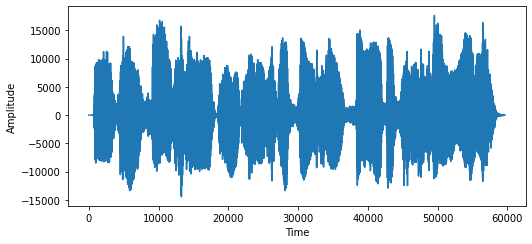

In [ ]:
audio1 = read("3_pred.wav")[1]
audio1=audio1
audio2=read("1_pred.wav")[1]
print(len(audio1), len(audio2))
#diff=audio1-audio2
plt.plot(audio1)
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.show()